<a href="https://colab.research.google.com/github/pedroblossbraga/supportvectormachines_tcc/blob/master/TCC_SVC_parametro_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm


def plot_SVC(
    X, y, 
    classificadores = None):
  if classificadores is None:
    # margem regular, rígida e suave, respectivamente
    classificadores = [("suave", 0.01, 'margem suave'),
                      ("regular", 1, 'margem regular'),  
                      ("rígido", 100, 'margem rígida')]

    # figure number
    fignum = 1

    # fazendo o fit dos modelos
    for name, penalty, title in classificadores:

      # classificador com seu parâmetro de penalidade
      clf = svm.SVC(kernel="linear", C=penalty)
      clf.fit(X, y) # treinamento

      # calculando o hiperplano de separação
      w = clf.coef_[0]
      a = -w[0] / w[1]
      xx = np.linspace(-5, 5)
      yy = a * xx - (clf.intercept_[0]) / w[1] # hiperplano de separação

      # calculando a margem
      margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

      # paralelas ao hiperplano de separação
      yy_down = yy - np.sqrt(1 + a ** 2) * margin # hiperplano inferior
      yy_up = yy + np.sqrt(1 + a ** 2) * margin # hiperplano superior

      # ---- gráfico
      plt.figure(figsize=(8,2))

      # linhas dos hiperplanos
      plt.clf()
      plt.plot(xx, yy, "k-")
      plt.plot(xx, yy_down, "k--")
      plt.plot(xx, yy_up, "k--")

      # vetores mais próximos ao hiperplano de separação
      plt.scatter(
          clf.support_vectors_[:, 0],
          clf.support_vectors_[:, 1],
          s=80,
          facecolors="none",
          zorder=10,
          edgecolors="k",
          cmap=cm.get_cmap("RdBu"),
      )
      # pontos
      plt.scatter(
          X[:, 0], X[:, 1], 
          c=Y,
          zorder=10, 
          cmap=cm.get_cmap("RdBu"), 
          edgecolors="k"
      )

      plt.axis("tight")
      # x_min = -4.8
      # x_max = 4.2
      # y_min = -6
      # y_max = 6

      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      Z = clf.decision_function(xy).reshape(XX.shape)

      # Put the result into a contour plot
      plt.contourf(XX, YY, Z, 
                  cmap=cm.get_cmap("RdBu"), 
                  alpha=0.5, 
                  linestyles=["-"])
      
      # plt.xlim(x_min, x_max)
      # plt.ylim(y_min, y_max)
      plt.xlim(XX[0][0], X[-1][0])
      plt.ylim(YY[0][-1], YY[-1][0])
      # plt.xticks(())
      # plt.yticks(())
      plt.title(r'{}, C={}, $w$={:.3f}'.format(title, penalty, margin), 
                fontsize=12)
      plt.show()

In [61]:
# we create 40 separable points
np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
X.shape, np.array(Y).shape

((40, 2), (40,))

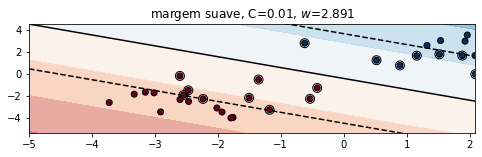

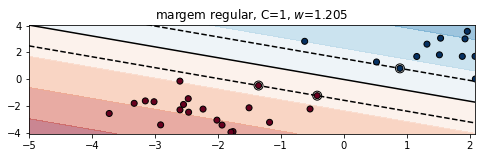

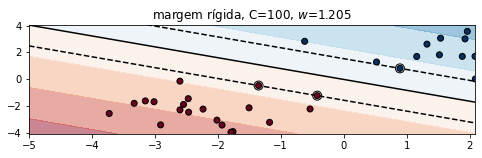

In [82]:
plot_SVC(X, Y)

# Dados iris

In [88]:
from sklearn import datasets
%matplotlib inline

# carregando o dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # selecionando apenas 2 features
y = iris.target

In [108]:
def plot_classification(clf, titulo):

  # create a mesh to plot in
  x_min = X[:, 0].min() - 1
  x_max = X[:, 0].max() + 1
  y_min = X[:, 1].min() - 1
  y_max = X[:, 1].max() + 1

  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  # plt.subplot(1, 1, 1)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Comprimento da Sépala', fontsize = 12)
  plt.ylabel('Largura da Sépala', fontsize = 12)
  plt.xlim(xx.min(), xx.max())
  plt.title(titulo, fontsize = 16)

  return plt


def test_C_param(
    X,y,
    kernel='rbf',
    C_list = None
    ):
  if C_list is None:
    C_list = [1e-3, 1e-2, 1, 1e2]

  plt.figure(figsize=(12, 5))

  for i, c in enumerate(C_list):
    clf = svm.SVC(kernel=kernel, C=c).fit(X,y)
    if kernel == 'linear':
      # 1/||w||_2
      margem = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
      titulo = 'SVC {}, C={:.2E}, margem= {:.3f}'.format(kernel, c, margem)
    else:
      titulo = 'SVC {}, C={:.2E}'.format(kernel, c)

    plt.subplot(2,2,i+1)
    fig = plot_classification(
        clf = clf,
        titulo = titulo
    )

  plt.tight_layout()
  plt.show()


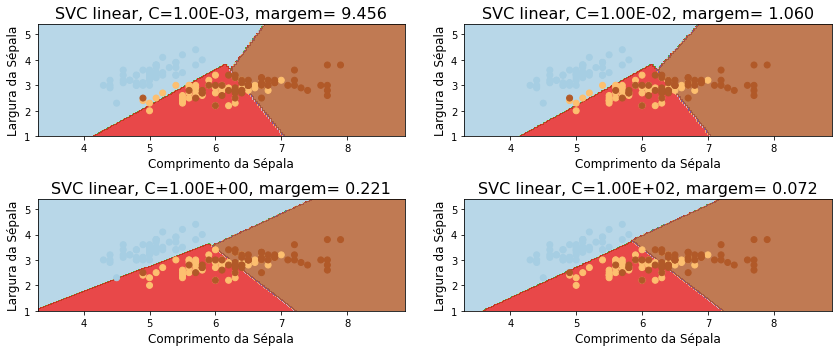

In [109]:
test_C_param(X,y, kernel='linear')

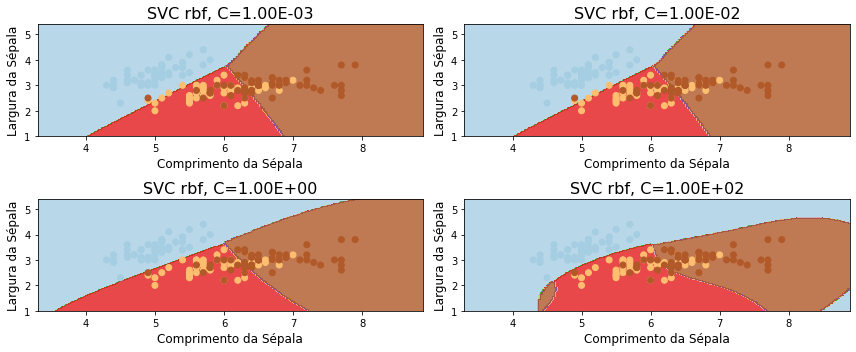

In [110]:
test_C_param(X,y, kernel='rbf')

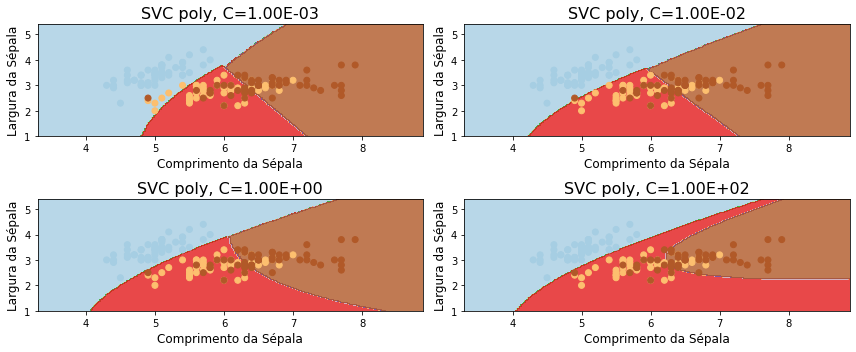

In [111]:
test_C_param(X,y, kernel='poly')

## Teste com outro dataset, 2 classes

In [84]:
X, y = datasets.make_blobs(
    n_samples=40, n_features=2, centers=2, cluster_std=2.05, random_state=42
)
X.shape, y.shape

((40, 2), (40,))

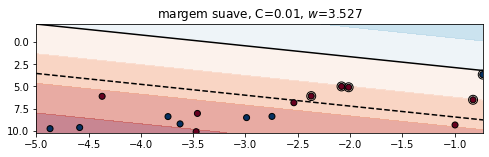

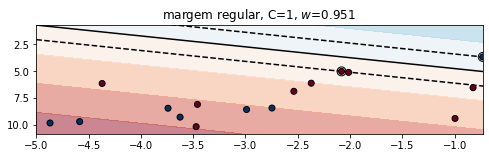

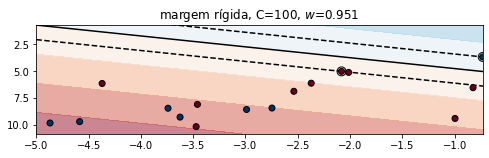

In [85]:
plot_SVC(X, y)